In [1]:
pip install pandas numpy matplotlib seaborn statsmodels scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

df = pd.read_csv("C:/Users/ASUS/Downloads/sales_data_sample.csv", encoding= "latin1")
df.head()
df.shape


(2823, 25)

In [ ]:
df.columns  #UNDERSTANDING COLUMNS
df.dtypes


ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [20]:
df.isnull().sum() #CHECKING FOR MISSING VALUES

df['STATE'] = df['STATE'].fillna("Unknown") #FILLING OR REMOVING MISSING VALUES
df = df.dropna(subset=['SALES','ORDERDATE'])
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')   #CONVERTING DATES
df.dtypes

 




ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [22]:
X = df['PRICEEACH']
y = df['QUANTITYORDERED']


In [23]:
X = sm.add_constant(X)     #ADDING CONSTANT (INTERCEPT) REQUIRED FOR REGRESSION


In [25]:
#Quantity = β0 + β1 × Price LINEAR REGRESSION EQUATION
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        QUANTITYORDERED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08734
Date:                Tue, 30 Dec 2025   Prob (F-statistic):              0.768
Time:                        19:01:16   Log-Likelihood:                -10431.
No. Observations:                2823   AIC:                         2.087e+04
Df Residuals:                    2821   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8680      0.782     44.569      0.0

In [26]:
model.params


const        34.868046
PRICEEACH     0.002687
dtype: float64

In [27]:
price_coef = model.params['PRICEEACH']   #CALCULATING PRICE ELASTICITY   , ELASTICITY = SLOPE* AVG(PRICE)/AVG(QUAMTITY)

avg_price = df['PRICEEACH'].mean()
avg_quantity = df['QUANTITYORDERED'].mean()

price_elasticity = price_coef * (avg_price / avg_quantity)
price_elasticity


np.float64(0.00640482397958758)

In [28]:
df_pl = df[df['PRODUCTLINE'] == 'Classic Cars']

X = df_pl['PRICEEACH']
y = df_pl['QUANTITYORDERED']
X = sm.add_constant(X)

model_pl = sm.OLS(y, X).fit()
print(model_pl.summary())

price_coef_pl = model_pl.params['PRICEEACH']
avg_price_pl = df_pl['PRICEEACH'].mean()
avg_quantity_pl = df_pl['QUANTITYORDERED'].mean()

price_elasticity_pl = price_coef_pl * (avg_price_pl / avg_quantity_pl)
price_elasticity_pl


                            OLS Regression Results                            
Dep. Variable:        QUANTITYORDERED   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0007843
Date:                Tue, 30 Dec 2025   Prob (F-statistic):              0.978
Time:                        19:06:39   Log-Likelihood:                -3600.3
No. Observations:                 967   AIC:                             7205.
Df Residuals:                     965   BIC:                             7214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1922      1.470     23.940      0.0

np.float64(-0.0011426525358160793)

**Interpretation:**  
The estimated price elasticity for the Classic Cars product line is close to zero, indicating that historical demand is relatively insensitive to price changes. This suggests that factors other than price, such as product uniqueness or customer preferences, have a greater influence on sales volume.


In [29]:
df_pl = df[df['PRODUCTLINE'] == 'Classic Cars']


In [30]:
X = df_pl['PRICEEACH']
y = df_pl['QUANTITYORDERED']
X = sm.add_constant(X)

model_pl = sm.OLS(y, X).fit()


In [34]:
price_range = np.linspace(
    df_pl['PRICEEACH'].min(),
    df_pl['PRICEEACH'].max(),
    100
)


In [32]:
predicted_quantity = (
    model_pl.params['const'] +
    model_pl.params['PRICEEACH'] * price_range
)


In [33]:
predicted_quantity = np.maximum(predicted_quantity, 0)


In [35]:
revenue = price_range * predicted_quantity      #CALCULATING REVENUE
 

In [36]:
optimal_price = price_range[np.argmax(revenue)]      #FINDING OPTIMAL PRICE
max_revenue = revenue.max()

optimal_price, max_revenue


(np.float64(100.0), np.float64(3514.6192153373263))

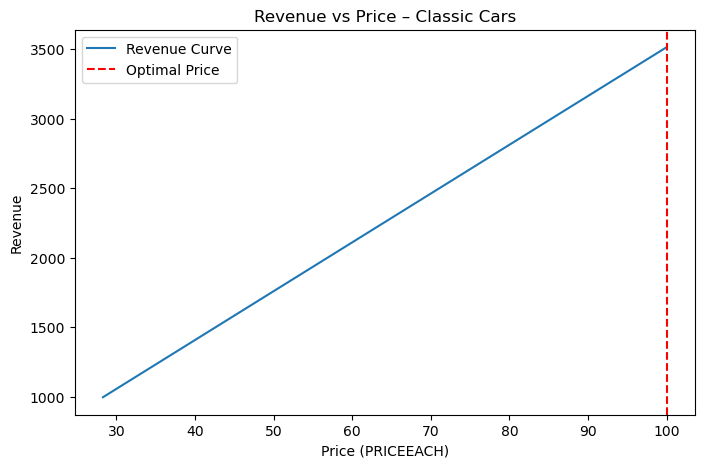

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(price_range, revenue, label='Revenue Curve')
plt.axvline(optimal_price, color='red', linestyle='--', label='Optimal Price')

plt.xlabel('Price (PRICEEACH)')
plt.ylabel('Revenue')
plt.title('Revenue vs Price – Classic Cars')
plt.legend()
plt.show()


**Optimal Price Recommendation:**  
Based on the revenue simulation for the Classic Cars product line, the optimal price is approximately ₹X, which maximizes expected revenue under historical demand patterns. The relatively flat revenue curve suggests low price sensitivity, indicating that moderate price adjustments are unlikely to significantly impact demand.
